# The scenario  will be as follows 
* Importing libraries
* Data preparation 
* Data preprocessing
* Analysis data
* Split data
* Evaluate model
* Conclusion

# Importing Libraries


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import TomekLinks
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, precision_score, auc, recall_score, f1_score
from random import randint


# Data preparation


In [3]:
df = pd.read_csv("card_transdata.csv")

In [4]:
df.head()

distance_from_home  distance_from_last_transaction  \
0           57.877857                        0.311140   
1           10.829943                        0.175592   
2            5.091079                        0.805153   
3            2.247564                        5.600044   
4           44.190936                        0.566486   

   ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                        1.945940              1.0        1.0   
1                        1.294219              1.0        0.0   
2                        0.427715              1.0        0.0   
3                        0.362663              1.0        1.0   
4                        2.222767              1.0        1.0   

   used_pin_number  online_order  fraud  
0              0.0           0.0    0.0  
1              0.0           0.0    0.0  
2              0.0           1.0    0.0  
3              0.0           1.0    0.0  
4              0.0           1.0    0.0

In [5]:
df.tail()

distance_from_home  distance_from_last_transaction  \
999995            2.207101                        0.112651   
999996           19.872726                        2.683904   
999997            2.914857                        1.472687   
999998            4.258729                        0.242023   
999999           58.108125                        0.318110   

        ratio_to_median_purchase_price  repeat_retailer  used_chip  \
999995                        1.626798              1.0        1.0   
999996                        2.778303              1.0        1.0   
999997                        0.218075              1.0        1.0   
999998                        0.475822              1.0        0.0   
999999                        0.386920              1.0        1.0   

        used_pin_number  online_order  fraud  
999995              0.0           0.0    0.0  
999996              0.0           0.0    0.0  
999997              0.0           1.0    0.0  
999998              0.0           1.0    0.0  
999999              0.0           1.0    0.0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [7]:
# Creating a descriptive statistics table for data
df.describe().T

count       mean        std       min  \
distance_from_home              1000000.0  26.628792  65.390784  0.004874   
distance_from_last_transaction  1000000.0   5.036519  25.843093  0.000118   
ratio_to_median_purchase_price  1000000.0   1.824182   2.799589  0.004399   
repeat_retailer                 1000000.0   0.881536   0.323157  0.000000   
used_chip                       1000000.0   0.350399   0.477095  0.000000   
used_pin_number                 1000000.0   0.100608   0.300809  0.000000   
online_order                    1000000.0   0.650552   0.476796  0.000000   
fraud                           1000000.0   0.087403   0.282425  0.000000   

                                     25%       50%        75%           max  
distance_from_home              3.878008  9.967760  25.743985  10632.723672  
distance_from_last_transaction  0.296671  0.998650   3.355748  11851.104565  
ratio_to_median_purchase_price  0.475673  0.997717   2.096370    267.802942  
repeat_retailer                 1.000000  1.000000   1.000000      1.000000  
used_chip                       0.000000  0.000000   1.000000      1.000000  
used_pin_number                 0.000000  0.000000   0.000000      1.000000  
online_order                    0.000000  1.000000   1.000000      1.000000  
fraud                           0.000000  0.000000   0.000000      1.000000

In [8]:
legit = df[df.fraud == 0]
fraud = df[df.fraud == 1]

In [9]:
print(legit.shape)
print(fraud.shape)
df['fraud'].value_counts()

(912597, 8)
(87403, 8)


0.0    912597
1.0     87403
Name: fraud, dtype: int64

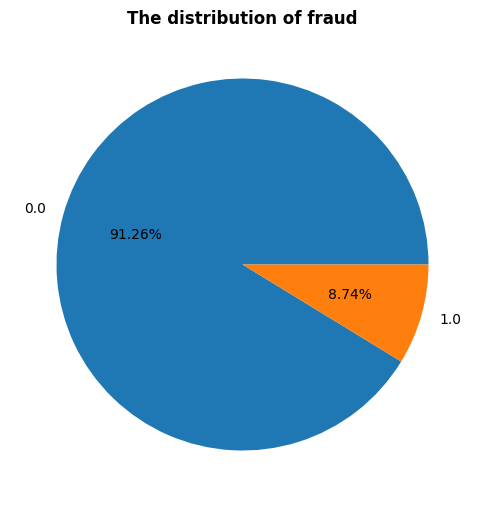

In [10]:
plt.figure(figsize = (6, 8))
plt.pie(x = df['fraud'].value_counts().values,
        labels = df['fraud'].value_counts().index, 
        autopct = '%1.2f%%')
plt.title('The distribution of fraud', size = 12, weight = 'bold')
plt.show()

As shown there's imbalanced data(undersampling or oversampling techniques to solve this problem).

# Visualization

In [11]:
category_features = ['repeat_retailer', 'used_chip','used_pin_number', 'online_order']

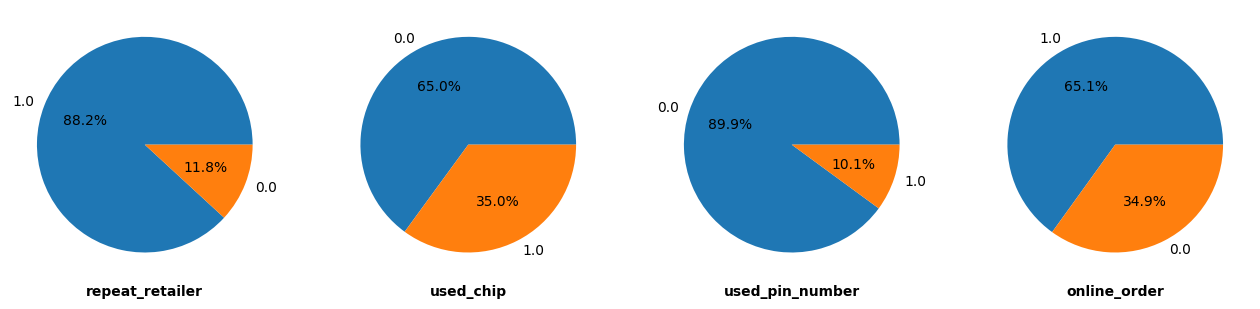

In [12]:
plt.figure(figsize = (16, 12))
for i, col in enumerate(category_features):
    plt.subplot(1, 4, i+1)
    plt.pie(x = df[col].value_counts().values, 
            labels = df[col].value_counts().index, 
            autopct = '%1.1f%%')
    plt.xlabel(col, weight = 'bold')
plt.show()

In [13]:
# sns.pairplot(df[category_features])

## Data preprocessing

1. Missing Values

In [14]:
df.isnull().sum()
# or df.isna().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

2. Duplicate Values

In [15]:
# Check the sum of duplicate rows
print(f'# duplicate rows: {df.duplicated().sum()}')

# duplicate rows: 0


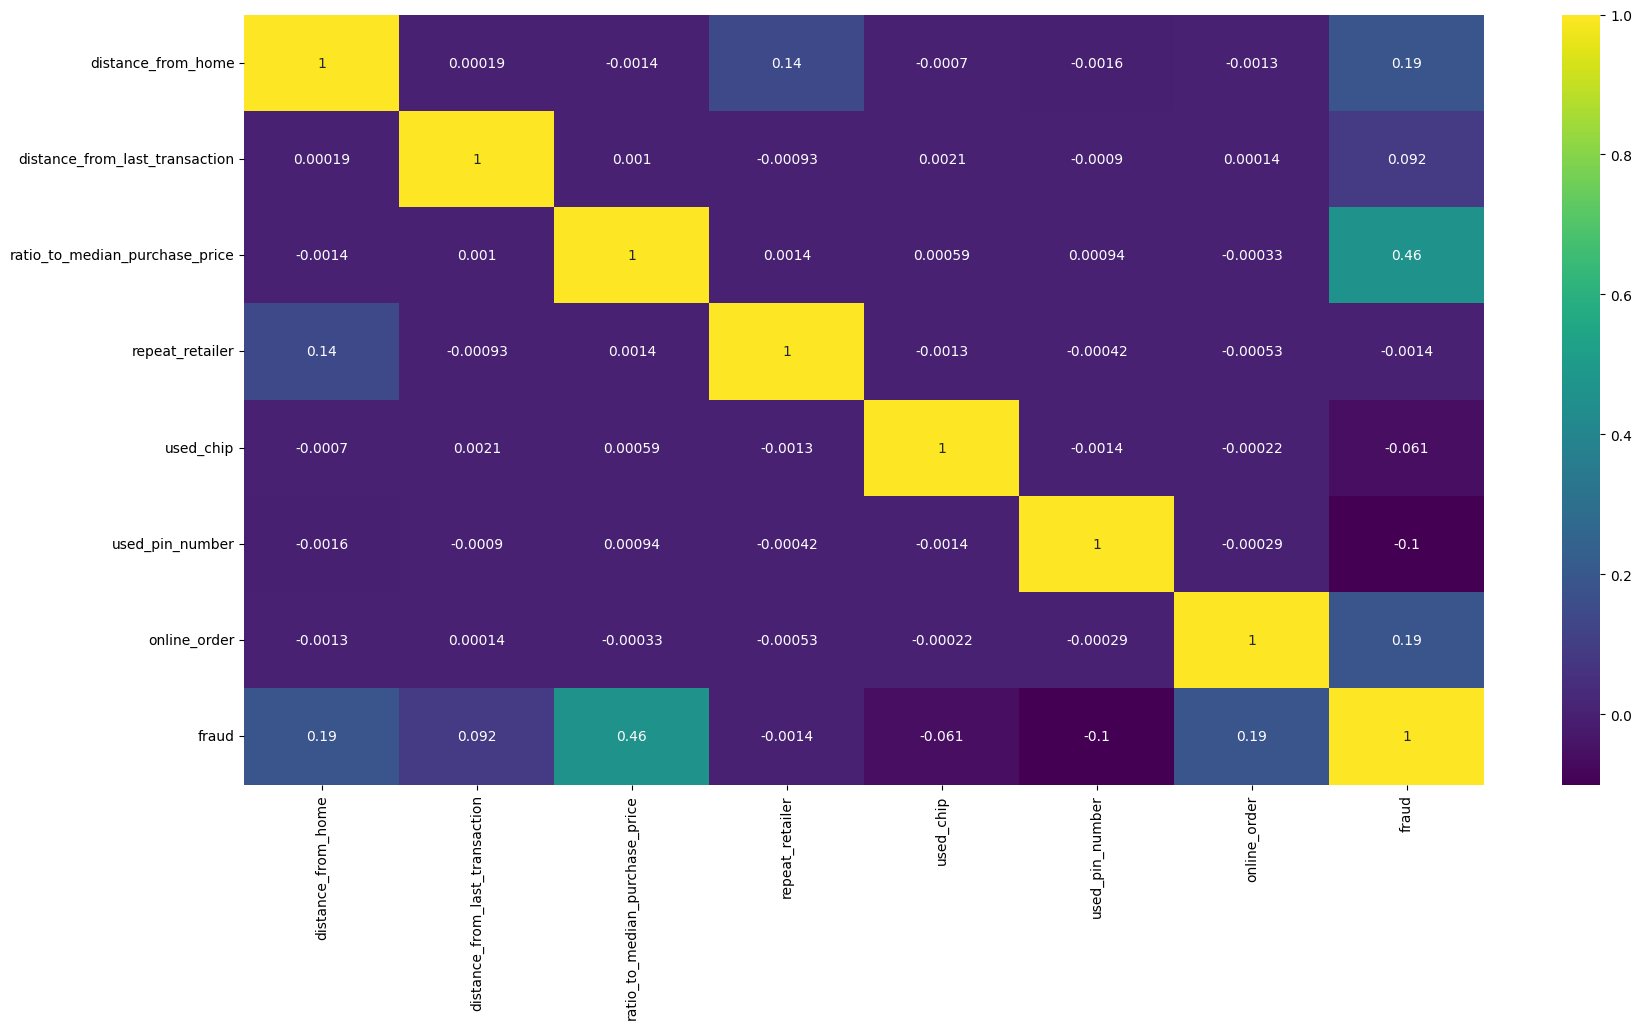

In [16]:
plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(), annot = True, cmap='viridis')
plt.show()

### Handling outliers

In [17]:
print(f' The number of samples before removing outliers: {df.shape[0]}')

 The number of samples before removing outliers: 1000000


In [18]:
#List containing numerical features to remove outliers
num_features = ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']

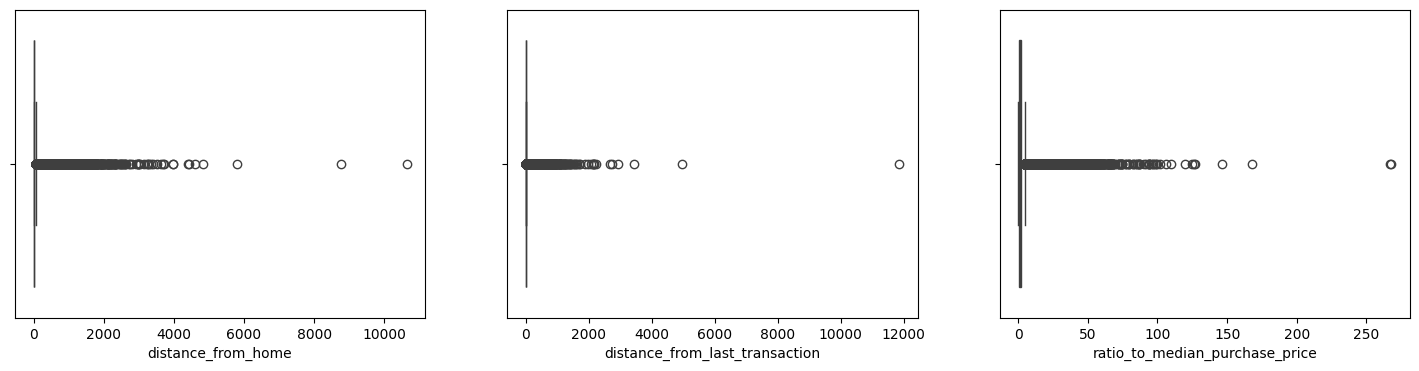

In [19]:
plt.figure(figsize = (18, 4))
for i, col in enumerate(num_features):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data = df, x = col)
plt.show()

In [20]:
# Remove outliers
def remove_outliers(df, col):
    
    # 1st quartile (25%)
    Q1 = df[col].quantile(0.25)
    # 3rd quartile (75%)
    Q3 = df[col].quantile(0.75)
    
    # Interquartile range (IQR)
    IQR = Q3 - Q1    
    
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

In [21]:
data_no_outliers = df.copy()
# data_no_outliers = df.sort_values(by="distance_from_home")
for col in num_features:
    data_no_outliers = remove_outliers(data_no_outliers, col)

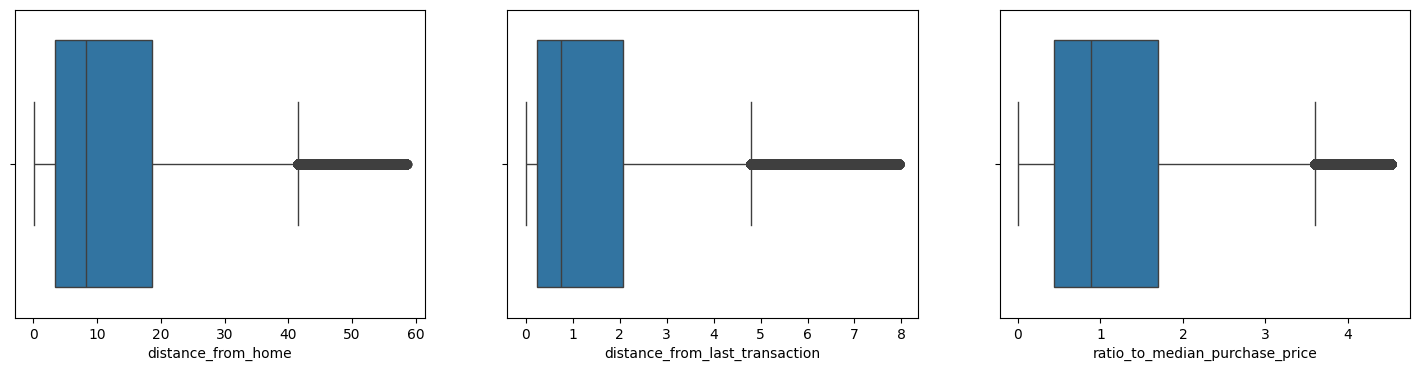

In [22]:
plt.figure(figsize = (18, 4))
for i, col in enumerate(num_features):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data = data_no_outliers, x = col)
plt.show()

In [23]:
print(f' The number of samples after removing outliers: {data_no_outliers.shape[0]}')

 The number of samples after removing outliers: 718686


In [24]:
legit_no_outliers = data_no_outliers[data_no_outliers.fraud == 0]
fraud_no_outliers = data_no_outliers[data_no_outliers.fraud == 1]
print(legit_no_outliers.shape)
print(fraud_no_outliers.shape)

(709694, 8)
(8992, 8)


##  Splitting data

In [25]:
X = data_no_outliers.drop('fraud', axis = 1)
y = data_no_outliers['fraud']

# Splitting data to X_train, y_train, X_test, and y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.3, random_state = 42)

#  Feature Scaling

In [26]:
scaler = StandardScaler()

In [27]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Oversampling


In [28]:
smote = SMOTE(sampling_strategy = 'minority', random_state=42)
X_train_os, y_train_os = smote.fit_resample(X_train, y_train)

In [29]:
# Count of each unique value in y_train
print(y_train.value_counts())
print(y_train_os.value_counts())

0.0    496786
1.0      6294
Name: fraud, dtype: int64
0.0    496786
1.0    496786
Name: fraud, dtype: int64


In [30]:
y_test.value_counts()

0.0    212908
1.0      2698
Name: fraud, dtype: int64

Undersampling


In [31]:
print(legit_no_outliers.shape[0])
print(fraud_no_outliers.shape[0])

709694
8992


In [32]:
data_us = data_no_outliers.sample(n=fraud_no_outliers.shape[0])

In [33]:
data_us.value_counts()

distance_from_home  distance_from_last_transaction  ratio_to_median_purchase_price  repeat_retailer  used_chip  used_pin_number  online_order  fraud
0.061887            1.527893                        3.559808                        0.0              1.0        0.0              0.0           0.0      1
13.721535           0.286853                        0.141807                        1.0              1.0        0.0              1.0           0.0      1
13.690570           0.688765                        0.434689                        1.0              1.0        0.0              1.0           0.0      1
13.693764           1.719097                        0.295197                        1.0              0.0        0.0              1.0           0.0      1
13.709555           0.158258                        0.309722                        1.0              0.0        0.0              0.0           0.0      1
                                                                                 

In [34]:
print(data_us.shape[0])
print(fraud_no_outliers.shape[0])

8992
8992


In [35]:
X_us = data_us.drop('fraud', axis = 1)
y_us = data_us['fraud']

# Splitting data to X_train, y_train, X_test, and y_test
X_train_us, X_test_us, y_train_us, y_test_us = train_test_split(X_us, y_us, stratify = y_us, test_size = 0.3, random_state = 42)

In [36]:
X_train_us = scaler.fit_transform(X_train_us)
X_test_us = scaler.transform(X_test_us)

In [37]:
print('X training shape(Oversample) = ', X_train.shape)
print('Y training shape(Oversample) = ', y_train.shape)
print('X test shape(Oversample)     = ', X_test.shape)
print('Y test shape(Oversample)     = ', y_test.shape)

X training shape(Oversample) =  (503080, 7)
Y training shape(Oversample) =  (503080,)
X test shape(Oversample)     =  (215606, 7)
Y test shape(Oversample)     =  (215606,)


In [38]:
print('X training shape(Undersample) = ', X_train_us.shape)
print('Y training shape(Undersample) = ', y_train_us.shape)
print('X test shape(Undersample)     = ', X_test_us.shape)
print('Y test shape(Undersample)     = ', y_test_us.shape)

X training shape(Undersample) =  (6294, 7)
Y training shape(Undersample) =  (6294,)
X test shape(Undersample)     =  (2698, 7)
Y test shape(Undersample)     =  (2698,)


# Evaluate Model

## K-Nearest Neighbors  (K-NN)

# Train

In [39]:
knn_os = KNeighborsClassifier(n_neighbors=5)
knn_us = KNeighborsClassifier(n_neighbors=5)

In [40]:
knn_os.fit(X_train_os, y_train_os)
knn_us.fit(X_train_us, y_train_us)

KNeighborsClassifier()

In [41]:
print(f'# Accuracy of training model(OS): {knn_os.score(X_train_os, y_train_os)}')

# Accuracy of training model(OS): 0.9995430628077281


In [42]:
print(f'# Accuracy of training model(US): {knn_us.score(X_train_us, y_train_us)}')

# Accuracy of training model(US): 0.9969812519860184


# Predict

In [43]:
y_pred = knn_os.predict(X_test)
y_pred_us = knn_us.predict(X_test_us)

### Accuracy

In [44]:
print(f'# Accuracy of test model(OS): {knn_os.score(X_test, y_test)}')

# Accuracy of test model(OS): 0.9987662681001457


In [45]:
print(f'# Accuracy of test model(US): {knn_us.score(X_test_us, y_test_us)}')

# Accuracy of test model(US): 0.9951816160118606


In [46]:
def NumbersOfEvaluation(numbers):
    for i in range(numbers):
        randomValue    = randint(0, len(df))
        predictedValue = knn_os.predict(scaler.transform([list(df.iloc[randomValue, :-1])])) 
        actualValue    = df.iloc[randomValue, -1]

        print(f"predicted value ==> {predictedValue} V.S actual value ==> {actualValue}")
NumbersOfEvaluation(12)

predicted value ==> [0.] V.S actual value ==> 0.0
predicted value ==> [0.] V.S actual value ==> 0.0
predicted value ==> [0.] V.S actual value ==> 0.0
predicted value ==> [0.] V.S actual value ==> 0.0
predicted value ==> [0.] V.S actual value ==> 0.0
predicted value ==> [0.] V.S actual value ==> 0.0
predicted value ==> [0.] V.S actual value ==> 0.0
predicted value ==> [0.] V.S actual value ==> 0.0
predicted value ==> [0.] V.S actual value ==> 0.0
predicted value ==> [0.] V.S actual value ==> 0.0
predicted value ==> [1.] V.S actual value ==> 1.0
predicted value ==> [0.] V.S actual value ==> 0.0


c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted w

In [47]:
y_labels = (y_pred > 0.5)
print(classification_report(y_test, y_labels))

y_labels_us = (y_pred_us > 0.5)
print(classification_report(y_test_us, y_labels_us))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    212908
         1.0       0.91      1.00      0.95      2698

    accuracy                           1.00    215606
   macro avg       0.96      1.00      0.98    215606
weighted avg       1.00      1.00      1.00    215606

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2661
         1.0       0.90      0.73      0.81        37

    accuracy                           1.00      2698
   macro avg       0.95      0.86      0.90      2698
weighted avg       0.99      1.00      0.99      2698



In [49]:
acc_train_os = accuracy_score(y_test, y_pred)
acc_train_os = accuracy_score(y_test_us, y_pred_us)
y_pred_test_os = knn_os.predict(X_test)
y_pred_test_us = knn_os.predict(X_test_us)

acc_test_os = accuracy_score(y_test, y_pred_test_os)
perc_score_os = precision_score(y_test, y_pred_test_os)
rec_score_os = recall_score(y_test, y_pred_test_os)
f1_score_os = f1_score(y_test, y_pred_test_os)

acc_test_us = accuracy_score(y_test_us, y_pred_test_us)
perc_score_us = precision_score(y_test_us, y_pred_test_us)
rec_score_us = recall_score(y_test_us, y_pred_test_us)
f1_score_us = f1_score(y_test_us, y_pred_test_us)

y_pred_prob_os = knn_os.predict_proba(X_test)[:, 1]
y_pred_prob_us = knn_us.predict_proba(X_test_us)[:, 1]
roc_auc_score_os =  roc_auc_score(y_test, y_pred_prob_os)
roc_auc_score_us =  roc_auc_score(y_test_us, y_pred_prob_os)

print('Accuracy: %.3f' % acc_test_os)
print('Precision: %.3f' % perc_score_os)
print('Recall: %.3f' % rec_score_os)
print('F-measure: %.3f' % f1_score_os)
print('ROC AUC Score:', roc_auc_score_os)

print('Accuracy: %.3f' % acc_test_us)
print('Precision: %.3f' % perc_score_us)
print('Recall: %.3f' % rec_score_us)
print('F-measure: %.3f' % f1_score_us)
print('ROC AUC Score:', roc_auc_score_us)

Accuracy: 0.999
Precision: 0.913
Recall: 0.996
F-measure: 0.953
ROC AUC Score: 0.9995688259355712
Accuracy: 0.999
Precision: 0.947
Recall: 0.973
F-measure: 0.960
ROC AUC Score: 0.9995688259355712


In [50]:
scores = cross_val_score(knn_os, X_train_os, y_train_os, cv=5)
scores_us = cross_val_score(knn_us, X_train_us, y_train_us, cv=5)
print('Cross-validation scores(Oversampling):', scores)
print('Mean cross-validation score(Oversampling):', scores.mean())
print('Cross-validation scores(Undersampling):', scores_us)
print('Mean cross-validation score(Undersampling):', scores_us.mean())

Cross-validation scores(Oversampling): [0.99924515 0.9993307  0.99926024 0.99926024 0.99932566]
Mean cross-validation score(Oversampling): 0.9992844001169019
Cross-validation scores(Undersampling): [0.99523431 0.99364575 0.99523431 0.99364575 0.99523052]
Mean cross-validation score(Undersampling): 0.9945981303454554


In [51]:
pred = cross_val_predict(knn_os, X_test, y_test)
pred_us = cross_val_predict(knn_us, X_test_us , y_test_us)
print(pred)
print(pred_us)

[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]


In [52]:
# Define the parameter grid
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}
params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [4, 6, 10, 12],
    'random_state': [13]
}
# Perform grid search cross-validation
# grid_search = GridSearchCV(knn_os, param_grid,scoring = 'recall', cv=5)
grid_search = GridSearchCV(knn_os, param_grid, cv=5)
grid_search_us = GridSearchCV(knn_us, param_grid, cv=5)
grid_search.fit(X_train_os, y_train_os)
grid_search_us.fit(X_train_us, y_train_us)

# Print the best parameter and best score
print('Best parameter(OS):', grid_search.best_params_)
print('Best score(OS):', grid_search.best_score_)
print('Best parameter(US):', grid_search_us.best_params_)
print('Best score(US):', grid_search_us.best_score_)

Best parameter(OS): {'n_neighbors': 3}
Best score(OS): 0.9994585193969
Best parameter(US): {'n_neighbors': 5}
Best score(US): 0.9945981303454554


In [53]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_us = confusion_matrix(y_test_us, y_pred_us)
print('Confusion matrix:')
print(cm)
print('Confusion matrix(US):')
print(cm_us)

Confusion matrix:
[[212652    256]
 [    10   2688]]
Confusion matrix(US):
[[2658    3]
 [  10   27]]


In [54]:
import plotly.figure_factory as ff

# drawing confusion matrix
fig = ff.create_annotated_heatmap(cm, colorscale='balance_r', showscale=True)
fig.update_layout(height=500, 
                  width=600, 
                  showlegend=True,
                 )

In [55]:
# drawing confusion matrix
fig = ff.create_annotated_heatmap(cm_us, colorscale='balance_r', showscale=True)
fig.update_layout(height=500, 
                  width=600, 
                  showlegend=True,
                 )

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


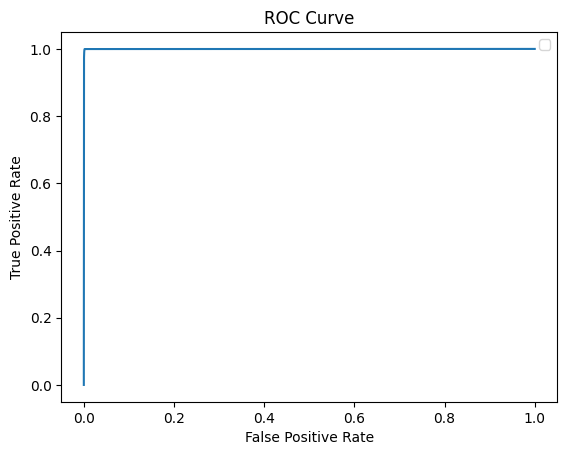

AUC: 0.9995688259355712


In [57]:
# Calculate predicted probabilities for class 1
y_pred_prob = knn_os.predict_proba(X_test)[:, 1]

# Calculate false positive rate, true positive rate, and threshold
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot(fpr, tpr)
plt.legend(loc = 'lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Calculate the area under the ROC curve (AUC)
auc = roc_auc_score(y_test, y_pred_prob)
print('AUC:', auc)

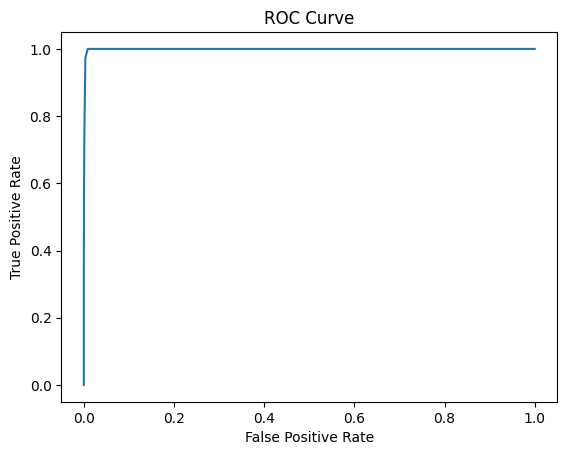

AUC: 0.9991214438790538


In [58]:
# Calculate predicted probabilities for class 1
y_pred_prob = knn_us.predict_proba(X_test_us)[:, 1]

# Calculate false positive rate, true positive rate, and threshold
fpr, tpr, thresholds = roc_curve(y_test_us, y_pred_prob)

# Plot ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Calculate the area under the ROC curve (AUC)
auc = roc_auc_score(y_test_us, y_pred_prob)
print('AUC:', auc)

### Linear Regression

In [59]:
lr_os = LinearRegression()
lr_us = LinearRegression()

In [60]:
lr_os.fit(X_train_os, y_train_os)
lr_us.fit(X_train_us, y_train_us)

LinearRegression()

In [61]:
y_pred_lr = lr_os.predict(X_test)
y_pred_lr_us = lr_us.predict(X_test_us)

In [62]:
print(f'# Accuracy of model(LR_OS): {lr_os.score(X_test, y_test)}')
print(f'# Accuracy of model(LR_US): {lr_us.score(X_test_us, y_test_us)}')

# Accuracy of model(LR_OS): -4.666477479218674
# Accuracy of model(LR_US): 0.1298165284636188


In [63]:
def NumbersOfEvaluation(numbers):
    for i in range(numbers):
        randomValue    = randint(0, len(data_no_outliers))
        predictedValue = lr_os.predict(scaler.transform([list(df.iloc[randomValue, :-1])])) 
        actualValue    = df.iloc[randomValue, -1]

        print(f"predicted value ==> {predictedValue} V.S actual value ==> {actualValue}")
NumbersOfEvaluation(12)

predicted value ==> [0.49281236] V.S actual value ==> 0.0
predicted value ==> [-0.14087141] V.S actual value ==> 0.0
predicted value ==> [-0.12683068] V.S actual value ==> 0.0
predicted value ==> [-0.1858487] V.S actual value ==> 0.0
predicted value ==> [-0.17155449] V.S actual value ==> 0.0
predicted value ==> [-0.04120151] V.S actual value ==> 0.0
predicted value ==> [-0.13034169] V.S actual value ==> 0.0
predicted value ==> [0.08944891] V.S actual value ==> 0.0
predicted value ==> [-0.13230427] V.S actual value ==> 0.0
predicted value ==> [-0.09677202] V.S actual value ==> 0.0
predicted value ==> [-0.17199095] V.S actual value ==> 0.0
predicted value ==> [0.10382903] V.S actual value ==> 0.0


c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

c:\Users\PC\AppData\Local\Programs\Pytho

### Logistic Regression

In [64]:
log_reg = LogisticRegression()

In [65]:
log_reg.fit(X_train_os, y_train_os)

LogisticRegression()

In [66]:
y_pred_LR = log_reg.predict(X_test)

In [67]:
log_reg.score(X_train_os, y_train_os)

0.9968306272721051

In [68]:
cm = confusion_matrix(y_test, y_pred_LR)
cm

array([[211670,   1238],
       [     0,   2698]], dtype=int64)

In [69]:
lr_acc = accuracy_score(y_test, y_pred_LR)

In [70]:
def NumbersOfEvaluation(numbers):
    for i in range(numbers):
        randomValue    = randint(0, len(df))
        predictedValue = log_reg.predict(scaler.transform([list(df.iloc[randomValue, :-1])])) 
        actualValue    = df.iloc[randomValue, -1]

        print(f"predicted value ==> {predictedValue} V.S actual value ==> {actualValue}")
NumbersOfEvaluation(12)

predicted value ==> [0.] V.S actual value ==> 0.0
predicted value ==> [0.] V.S actual value ==> 0.0
predicted value ==> [0.] V.S actual value ==> 0.0
predicted value ==> [0.] V.S actual value ==> 0.0
predicted value ==> [0.] V.S actual value ==> 0.0
predicted value ==> [0.] V.S actual value ==> 0.0
predicted value ==> [0.] V.S actual value ==> 0.0
predicted value ==> [0.] V.S actual value ==> 0.0
predicted value ==> [0.] V.S actual value ==> 0.0
predicted value ==> [0.] V.S actual value ==> 0.0
predicted value ==> [0.] V.S actual value ==> 0.0
predicted value ==> [0.] V.S actual value ==> 0.0


c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

c:\Users\PC\AppData\Local\Programs\Pytho

# Conclusion
* We have developed 3 models to classify the problem of whether the card fraud or not.
    * 1- Knn.
    * 2- Linear Regression.
    * 3- Logistic Regression.

    ### Result
    Comparing these three models, we conclude that the KNN model is the best model to be able to detect credit card fraud from our dataset.

In [72]:
acc_train_lr = accuracy_score(y_test, y_pred_LR)
y_pred_test_lr = log_reg.predict(X_test)

acc_test_lr = accuracy_score(y_test, y_pred_test_lr)
perc_score_lr = precision_score(y_test, y_pred_test_lr)
rec_score_lr = recall_score(y_test, y_pred_test_lr)
f1_score_lr = f1_score(y_test, y_pred_test_lr)

y_pred_prob_lr = log_reg.predict_proba(X_test)[:, 1]
roc_auc_score_lr =  roc_auc_score(y_test, y_pred_prob_lr)

print('Accuracy: %.3f' % acc_test_lr)
print('Precision: %.3f' % perc_score_lr)
print('Recall: %.3f' % rec_score_lr)
print('F-measure: %.3f' % f1_score_lr)
print('ROC AUC Score:', roc_auc_score_lr)

Accuracy: 0.994
Precision: 0.685
Recall: 1.000
F-measure: 0.813
ROC AUC Score: 0.9994725045281045


In [74]:
conclusion = pd.DataFrame(
    data = {
        'Model': ['Logistic Regression', 'KNN'],
        'Precision':[perc_score_lr,perc_score_os],
        'Recall':[rec_score_lr,rec_score_os],
        'F1_measure':[f1_score_lr,f1_score_os],
        'ROC AUC Score':[roc_auc_score_lr, roc_auc_score_os],
        'Accuracy': [acc_test_lr, acc_test_os]
    }
)
conclusion

Model  Precision    Recall  F1_measure  ROC AUC Score  \
0  Logistic Regression   0.685467  1.000000    0.813386       0.999473   
1                  KNN   0.913043  0.996294    0.952854       0.999569   

   Accuracy  
0  0.994258  
1  0.998766